In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

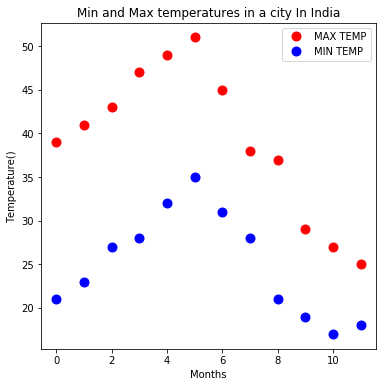

In [52]:
fig=plt.figure(figsize=(6,6))

max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)
plt.plot(months, max_temp , 'go', color = 'r' , label = 'MAX TEMP' , marker = "o", markerfacecolor="red" , markersize = 9)
plt.plot(months , min_temp , 'go', color = 'b' , label = 'MIN TEMP', marker = "o", markerfacecolor="blue" , markersize = 9)
plt.title('Min and Max temperatures in a city In India')
plt.xlabel("Months")
plt.ylabel("Temperature()")
plt.legend()

In [53]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      max_temp, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      min_temp, [-40, 20, 0])

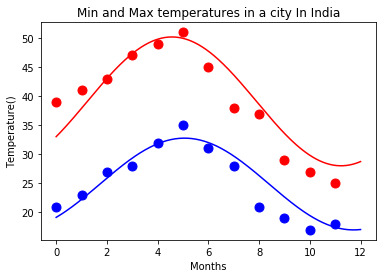

In [54]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, max_temp , 'go', color = 'r' , label = 'MAX TEMP' , marker = "o", markerfacecolor="red" , markersize = 9)
plt.plot(days, yearly_temps(days, *res_max), 'm-' , color = 'r')
plt.plot(months , min_temp , 'go', color = 'b' , label = 'MIN TEMP', marker = "o", markerfacecolor="blue" , markersize = 9)
plt.plot(days, yearly_temps(days, *res_min), 'y-' , color = 'b')
plt.title('Min and Max temperatures in a city In India')
plt.xlabel("Months")
plt.ylabel("Temperature()")

plt.show()

In [55]:
import pandas as pd

url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

In [56]:
titanic.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x12cc1cccec8>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'Male Proportion'),
  Text(0.48083667958064136, -0.9893412391939719, 'Female Proportion')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.40%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.60%')])

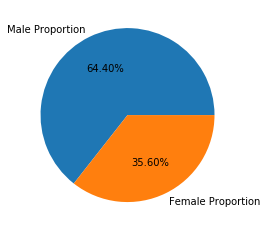

In [57]:
plt.pie(titanic.sex.value_counts(), labels=["Male Proportion" , "Female Proportion"] , autopct = '%1.2f%%')

In [61]:
titanic.sex = titanic.sex.fillna("male")

In [62]:
colors = {'male':'blue', 'female':'orange'}

Text(0, 0.5, 'Fare Paid')

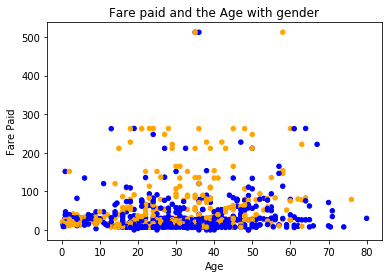

In [65]:
titanic.plot.scatter(x = 'age', y = 'fare' , c = titanic['sex'].iloc[:].apply(lambda x: colors[x]))
plt.title('Fare paid and the Age with gender')
plt.xlabel("Age")
plt.ylabel("Fare Paid")